In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

n_dados = 10
n_tiradas_por_dado = 10_000_000

def simulador_tirar_n_dados(n_dados, n_tiradas_por_dado):
    tiradas = np.random.randint(1,7, size = (n_tiradas_por_dado, n_dados))
    suma_dados = tiradas.sum(axis = 1)
    return suma_dados


def elementos_no_presentes(suma_dados, n_dados):
    sorted_elements = sorted(set(suma_dados))
    min_number = n_dados
    max_number = n_dados*6

    non_present = []
    for n in range(min_number, max_number + 1):
        if n not in sorted_elements:
            non_present.append(n)
    return non_present

In [3]:
n_dados_list = [1,2,5,10,15]
n_tiradas_por_dado = 10_000_000
n_tiradas_por_dado_list = [50, 100, 200, 500, 750, 1000,1250, 5000, 7500, 
                           10_000,50_000,100_000, 500_000, 1_000_000, 5_000_000]

In [4]:
sns.set(rc={'figure.figsize':(12,8)})


In [39]:
stats = {}
n_dados_max = 16

n_dados_list = range(1,n_dados_max)
n_tiradas_por_dado_list = [100, 1_000_000]
for n_dados in n_dados_list:
    for n_tiradas_por_dado in n_tiradas_por_dado_list:
        suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
        stats[(n_dados, n_tiradas_por_dado)] = {"mean" : suma_dados.mean(), "std" : suma_dados.std(), "var" : suma_dados.var()}

df_stats = pd.DataFrame(stats).T

In [40]:
df_stats.index.set_names(["n_dados", "n_tiradas_por_dado"], inplace = True)
#df_stats.to_csv("stats_dados_2_precisiones.csv")

In [53]:
precise = df_stats.xs(1_000_000, level=1)

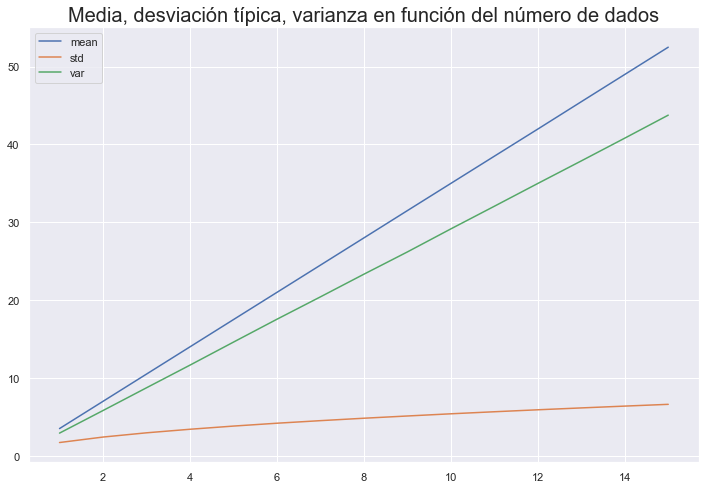

In [34]:
ax = precise.plot().set_title("Media, desviación típica, varianza en función del número de dados", size = 20)
fig = ax.get_figure()
fig.savefig('mean_std_var_n_dados_100.png')

In [57]:
!pwd

/Users/juanluisrto/Documents/Projects/central_limit_theorem_with_dice


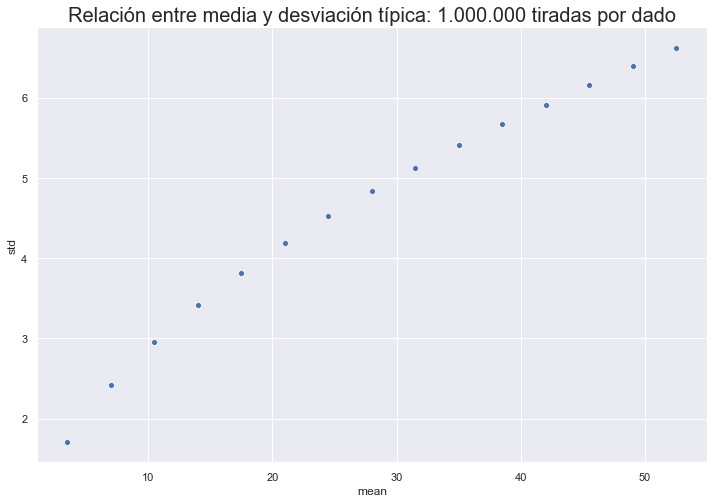

In [56]:
ax  = sns.scatterplot(precise["mean"],precise["std"] ).set_title("Relación entre media y desviación típica: 1.000.000 tiradas por dado", size = 20)
fig = ax.get_figure()
#fig.savefig('mean_vs_std_1_000_000.png')

In [179]:
n_dados = 15
for n_tiradas_por_dado in tqdm(n_tiradas_por_dado_list):
    suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
    title = f"Distribución de la suma de {n_dados} dados tirados {n_tiradas_por_dado:,} veces"
    n_tiradas_str = str(n_tiradas_por_dado).rjust(7,"0")
    file_name = f"n_tiradas={n_tiradas_str}.png"
    g = sns.histplot(suma_dados, binwidth = 1, binrange = (n_dados, n_dados*6 + 1) )
    g.set_title(title, size = 20)
    g.set(
        xlabel=f'Suma de los {n_dados} dados',
        ylabel = f'Veces que la suma aparece')
    g.get_figure().savefig(f"png/{file_name}")
    plt.clf()

100%|██████████| 15/15 [00:06<00:00,  2.19it/s]


<Figure size 864x576 with 0 Axes>

Probabilidad de que salgan todos los dados = 3

In [247]:
n_dados = 10
no_presentes_dict = {}
for n_tiradas_por_dado in tqdm(n_tiradas_por_dado_list):
    suma_dados = simulador_tirar_n_dados(n_dados, n_tiradas_por_dado)
    no_presentes = elementos_no_presentes(suma_dados, n_dados)
    no_presentes_dict[n_tiradas_por_dado] = no_presentes

100%|██████████| 15/15 [00:01<00:00, 10.00it/s]


In [184]:
import pandas as pd

In [248]:
unique_numbers = set()
for lists in no_presentes_dict.values():
    for number in lists:
        unique_numbers.add(number)
    

In [262]:
table = pd.DataFrame(columns = unique_numbers, index = no_presentes_dict.keys()).T
for key, value in no_presentes_dict.items():
    for v in value:
        table.loc[v,key] = True
    print(f"{key} veces ", value)

50 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
100 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
200 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
500 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60]
750 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60]
1000 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
1250 veces  [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 51, 54, 55, 56, 57, 58, 59, 60]
5000 veces  [10, 11, 12, 13, 14, 15, 16, 55, 56, 57, 58, 59, 60]
7500 veces  [10, 11, 12, 13, 14, 15, 16, 55, 57, 58, 59, 60]
10000 veces  [10, 11, 12, 13, 14, 55, 57, 58, 59, 60]
50000 veces  [10, 11, 12, 14, 55, 56, 57, 58, 59, 60]
100000 veces  [10, 11, 12, 13

In [263]:
table.fillna(value = False, inplace=True)

In [257]:
def highlight_true(s):
    if s:
        return 'background-color: green'
    else:
        return 'background-color: red'
        


In [285]:
inverse = ~table
inverse_style = inverse.style.applymap(highlight_true)

In [291]:
inverse_style.index.name = "Suma de 10 dados"

In [295]:
print("Número de veces que tiramos 10 dados")
inverse_style

Número de veces que tiramos 10 dados


,50,100,200,500,750,1000,1250,5000,7500,10000,50000,100000,500000,1000000,5000000
Suma de 10 dados,,,,,,,,,,,,,,,
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
13,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
14,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
15,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
17,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
18,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True


In [284]:
type(inverse)

pandas.io.formats.style.Styler

In [268]:
m_index = pd.MultiIndex.from_tuples(map(lambda x: ('E', x), inverse.columns))

In [272]:
m_index

MultiIndex([('E',      50),
            ('E',     100),
            ('E',     200),
            ('E',     500),
            ('E',     750),
            ('E',    1000),
            ('E',    1250),
            ('E',    5000),
            ('E',    7500),
            ('E',   10000),
            ('E',   50000),
            ('E',  100000),
            ('E',  500000),
            ('E', 1000000),
            ('E', 5000000)],
           )

In [270]:
inverse.columns = m_index

In [180]:
import imageio, os
images = []
filenames =sorted([filename for filename in os.listdir("./png/")])
for filename in filenames:
    if filename.endswith(".png"):
        images.append(imageio.imread(f"png/{filename}"))
imageio.mimsave("png/distribution_tiradas.gif", images,  duration=0.5)

In [25]:
1/6**n_dados

0.0001286008230452675